# INNOMATICS 
## Hackathon Task
### Author : Mohit Kumar
### Email : mohitkrs848@gmail.com

#### Step 1 : 

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data.csv")
df

,x1,x2,y
0,-119.366669,1.150000e+02,1
1,-101.108044,9.777716e+01,1
2,-130.278658,1.067677e+02,1
3,-114.703415,1.011955e+02,1
4,-119.366669,1.150000e+02,1
...,...,...,...
2222,98.714112,8.964312e+01,0
2223,96.633331,9.100000e+01,0
2224,85.673940,1.038393e+02,0
2225,78.958862,7.860537e+01,0


In [4]:
df.describe()

,x1,x2,y
count,2222.000000,2.224000e+03,2227.000000
mean,-4.818766,8.947626e+04,0.442299
std,74.939909,2.983323e+06,0.496771
min,-134.369160,-1.348761e+02,0.000000
25%,-71.757030,-8.012983e+01,0.000000
50%,-9.836555,-1.046151e+00,0.000000
75%,59.813962,6.389086e+01,1.000000
max,134.508687,1.000000e+08,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
x1    2222 non-null float64
x2    2224 non-null float64
y     2227 non-null int64
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


In [21]:
df.isnull().sum().sum()

8

In [20]:
df.dropna(axis=0,how='all')

,x1,x2,y
0,-119.366669,1.150000e+02,1
1,-101.108044,9.777716e+01,1
2,-130.278658,1.067677e+02,1
3,-114.703415,1.011955e+02,1
4,-119.366669,1.150000e+02,1
...,...,...,...
2222,98.714112,8.964312e+01,0
2223,96.633331,9.100000e+01,0
2224,85.673940,1.038393e+02,0
2225,78.958862,7.860537e+01,0


In [19]:
df.shape

(2227, 3)

In [22]:
df.corr()

,x1,x2,y
x1,1.000000,0.037288,-0.121299
x2,0.037288,1.000000,-0.026724
y,-0.121299,-0.026724,1.000000


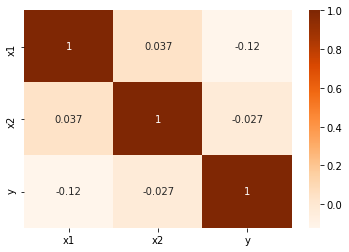

In [61]:
sns.heatmap(df.corr(),annot=True,cmap='Oranges')

In [26]:
df.cov()

,x1,x2,y
x1,5.615990e+03,8.345746e+06,-4.515335
x2,8.345746e+06,8.900213e+12,-39606.680644
y,-4.515335e+00,-3.960668e+04,0.246781


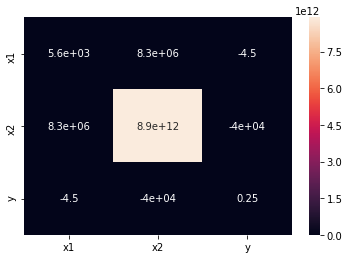

In [63]:
sns.heatmap(df.cov(),annot=True)

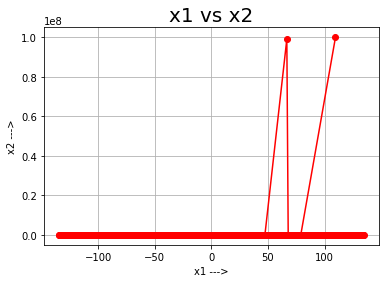

In [49]:
plt.plot(df['x1'],df['x2'],color = 'red',marker='o')
plt.title("x1 vs x2",size = 20)
plt.xlabel('x1 --->')
plt.ylabel('x2 --->')
plt.grid(True)
plt.show()

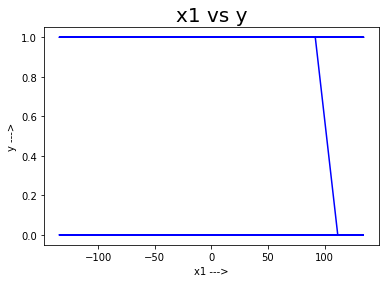

In [47]:
plt.plot(df['x1'],df['y'],color='blue')
plt.title("x1 vs y",size = 20)
plt.xlabel('x1 --->')
plt.ylabel('y --->')
plt.show()

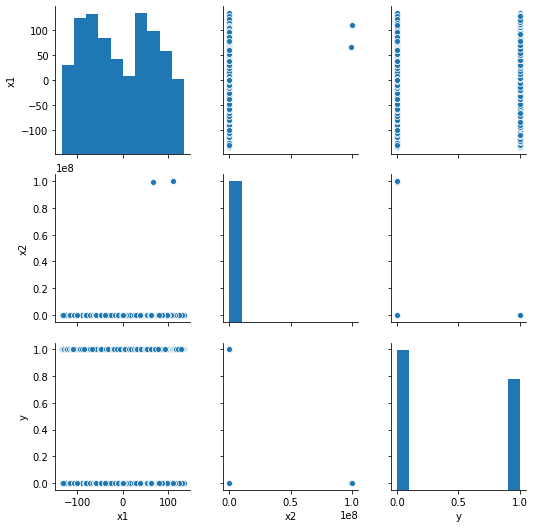

In [67]:

sns.pairplot(df)

### Step 2 : (a) Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [81]:
X = df[['x1','x2']]
Y = df['y']
X.fillna(0,inplace = True)
Y.fillna(0,inplace = True)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size =0.3,random_state=0)
lgr = LogisticRegression()
lgr.fit(X_train,Y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [82]:
Y_pred = lgr.predict(X_test)

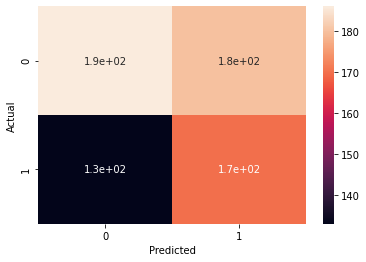

In [84]:
confusion_matrix = pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [85]:
print('Accuracy: ',metrics.accuracy_score(Y_test, Y_pred))
plt.show()

Accuracy:  0.5321375186846039


### (b) : SVM with Linear Kernel

In [101]:
from sklearn import svm, datasets
from sklearn.svm import SVC

In [87]:
svc = svm.SVC(kernel ='linear', C = 1).fit(X, Y)

In [91]:
Y_pred = svc.predict(X_test)

In [92]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[366   0]
 [303   0]]
              precision    recall  f1-score   support

           0       0.55      1.00      0.71       366
           1       0.00      0.00      0.00       303

    accuracy                           0.55       669
   macro avg       0.27      0.50      0.35       669
weighted avg       0.30      0.55      0.39       669



### (c) : SVM with RBF Kernel

In [102]:
sv = SVC(kernel='rbf', random_state=1, gamma=0.008, C=0.1)
sv.fit(X_train,Y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.008, kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

### (d) : Decision Tree


In [106]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [115]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, Y)
data = tree.export_graphviz(dtree, out_file=None)


In [116]:
print(dtree.predict([[2, 1]]))

[1]


### (e) : KNN

In [117]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [118]:
y_pred = classifier.predict(X_test)

In [119]:
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[366   0]
 [303   0]]
              precision    recall  f1-score   support

           0       0.55      1.00      0.71       366
           1       0.00      0.00      0.00       303

    accuracy                           0.55       669
   macro avg       0.27      0.50      0.35       669
weighted avg       0.30      0.55      0.39       669



In [120]:
error = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Mean Error')

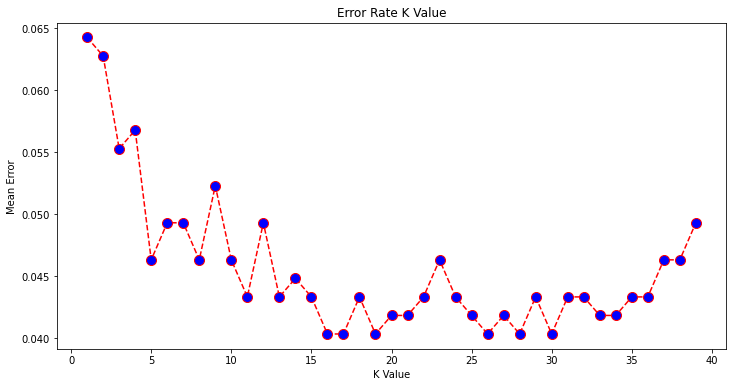

In [121]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

### Step 4 : Perform proper hyperparameter tuning for each model
I want to be absolutely clear, hyperparameters are not model parameters and they cannot be directly trained from the data. Model parameters are learned during training when we optimize a loss function using something like gradient descent.The process for learning parameter values is shown generally below.Whereas the model parameters specify how to transform the input data into the desired output, the hyperparameters define how our model is actually structured. Unfortunately, there's no way to calculate “which way should I update my hyperparameter to reduce the loss?” (ie. gradients) in order to find the optimal model architecture; thus, we generally resort to experimentation to figure out what works best.

In general, this process includes:

Define a model
Define the range of possible values for all hyperparameters
Define a method for sampling hyperparameter values
Define an evaluative criteria to judge the model
Define a cross-validation method
Grid search
Grid search is arguably the most basic hyperparameter tuning method. With this technique, we simply build a model for each possible combination of all of the hyperparameter values provided, evaluating each model, and selecting the architecture which produces the best results.Random search
Random search differs from grid search in that we longer provide a discrete set of values to explore for each hyperparameter; rather, we provide a statistical distribution for each hyperparameter from which values may be randomly sampled.Bayesian optimization
The previous two methods performed individual experiments building models with various hyperparameter values and recording the model performance for each. Because each experiment was performed in isolation, it's very easy to parallelize this process. However, because each experiment was performed in isolation, we're not able to use the information from one experiment to improve the next experiment. Bayesian optimization belongs to a class of sequential model-based optimization (SMBO) algorithms that allow for one to use the results of our previous iteration to improve our sampling method of the next experiment.

### Step 4 : Compare all the models and write your observations i.e. why is one model better than the other

The answer to the question varies depending on many factors, including:

The size, quality, and nature of data.
The available computational time.
The urgency of the task.
What you want to do with the data.
Even an experienced data scientist cannot tell which algorithm will perform the best before trying different algorithms. We are not advocating a one-and-done approach, but we do hope to provide some guidance on which algorithms to try first depending on some clear factors.When choosing an algorithm, always take these aspects into account: accuracy, training time and ease of use. Many users put the accuracy first, while beginners tend to focus on algorithms they know best.

When presented with a dataset, the first thing to consider is how to obtain results, no matter what those results might look like. Beginners tend to choose algorithms that are easy to implement and can obtain results quickly. This works fine, as long as it is just the first step in the process. Once you obtain some results and become familiar with the data, you may spend more time using more sophisticated algorithms to strengthen your understanding of the data, hence further improving the results.

Even in this stage, the best algorithms might not be the methods that have achieved the highest reported accuracy, as an algorithm usually requires careful tuning and extensive training to obtain its best achievable performance.